In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [58]:
import tensorflow as tf 
print(tf.__version__)

2.7.0


In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]
train_path = '/content/drive/MyDrive/Datasets/Train'
valid_path = '/content/drive/MyDrive/Datasets/Test'

In [ ]:
# Import the Resnet library as shown below and add preprocessing layer to the front of Resnet
# Here we will be using imagenet weights
resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [ ]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Datasets/Train/*')

In [ ]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Datasets/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Datasets/Train',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/50
2/2 [==============================] - 33s 18s/step - loss: 4.5835 - accuracy: 0.3750 - val_loss: 15.5048 - val_accuracy: 0.3125
Epoch 2/50
2/2 [==============================] - 21s 15s/step - loss: 13.3704 - accuracy: 0.3125 - val_loss: 3.0159 - val_accuracy: 0.4531
Epoch 3/50
2/2 [==============================] - 22s 16s/step - loss: 3.3964 - accuracy: 0.4688 - val_loss: 8.1155 - val_accuracy: 0.3906
Epoch 4/50
2/2 [==============================] - 21s 15s/step - loss: 8.4319 - accuracy: 0.3906 - val_loss: 7.4960 - val_accuracy: 0.3906
Epoch 5/50
2/2 [==============================] - 21s 15s/step - loss: 7.4668 - accuracy: 0.3906 - val_loss: 7.2183 - val_accuracy: 0.4062
Epoch 6/50
2/2 [==============================] - 21s 15s/step - loss: 6.0288 - accuracy: 0.3750 - val_loss: 1.8978 - val_accuracy: 0.4531
Epoch 7/50
2/2 [==============================] - 21s 15s/step - loss: 1.5415 - accuracy: 0.5312 - val_loss: 4.1351 - val_accuracy: 0.4375
Epoch 8/50
2/2 [=========

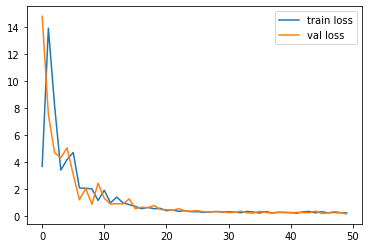

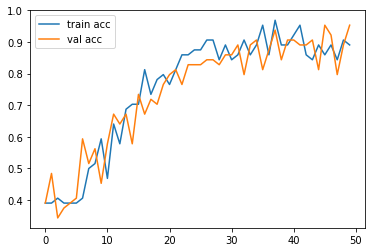

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('/content/drive/MyDrive/model_resnet50.h5')

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [ ]:

y_pred = model.predict(test_set)


In [ ]:
y_pred

array([[9.7003418e-01, 1.9712560e-03, 2.7994588e-02],
       [4.7816016e-02, 2.2640505e-01, 7.2577894e-01],
       [1.4205911e-02, 7.1108276e-01, 2.7471137e-01],
       [1.3914254e-01, 5.9913361e-01, 2.6172388e-01],
       [5.1092929e-01, 2.4565266e-01, 2.4341796e-01],
       [1.7014001e-02, 2.6691085e-01, 7.1607512e-01],
       [5.9957355e-02, 8.6560416e-01, 7.4438564e-02],
       [9.0892982e-01, 8.2315929e-02, 8.7542310e-03],
       [3.0751127e-01, 1.8172402e-02, 6.7431635e-01],
       [6.6835812e-16, 3.3587709e-14, 1.0000000e+00],
       [9.9478769e-01, 5.1175207e-03, 9.4770512e-05],
       [1.9918293e-04, 1.8888572e-06, 9.9979895e-01],
       [1.8057907e-03, 9.9673802e-01, 1.4561698e-03],
       [8.2993925e-02, 6.8144476e-01, 2.3556131e-01],
       [7.8128606e-01, 1.5482976e-01, 6.3884214e-02],
       [9.8813407e-04, 9.8793155e-01, 1.1080368e-02],
       [1.4515901e-02, 2.6001735e-02, 9.5948231e-01],
       [3.0328801e-02, 1.7502618e-01, 7.9464501e-01],
       [4.2126563e-01, 4.881

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([0, 2, 1, 1, 0, 2, 1, 0, 2, 2, 0, 2, 1, 1, 0, 1, 2, 2, 1, 0, 2, 2,
       1, 1, 0, 0, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 0, 0, 0, 1, 0, 0, 2, 1,
       1, 2, 0, 1, 2, 1, 2, 1, 0, 2, 0, 0, 2, 0, 0, 2, 1, 2, 0, 1])

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('/content/model_resnet50.h5')

In [ ]:
img=image.load_img('/content/drive/MyDrive/Datasets/Test/audi/29.jpg',target_size=(224,224))

In [ ]:
x=image.img_to_array(img)
x

array([[[ 64.,  64.,  72.],
        [ 36.,  36.,  44.],
        [ 39.,  39.,  47.],
        ...,
        [200., 206., 220.],
        [200., 206., 220.],
        [200., 206., 220.]],

       [[121., 121., 129.],
        [ 89.,  89.,  97.],
        [ 74.,  74.,  82.],
        ...,
        [199., 205., 219.],
        [199., 205., 219.],
        [199., 205., 219.]],

       [[121., 121., 129.],
        [ 89.,  89.,  97.],
        [ 74.,  74.,  82.],
        ...,
        [199., 205., 219.],
        [199., 205., 219.],
        [199., 205., 219.]],

       ...,

       [[167., 170., 175.],
        [164., 167., 172.],
        [163., 166., 171.],
        ...,
        [163., 166., 171.],
        [163., 166., 171.],
        [162., 165., 170.]],

       [[167., 170., 175.],
        [164., 167., 172.],
        [163., 166., 171.],
        ...,
        [163., 166., 171.],
        [163., 166., 171.],
        [162., 165., 170.]],

       [[170., 173., 178.],
        [168., 171., 176.],
        [166., 1

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x=x/255

In [ ]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data)

array([[0.10691272, 0.3655908 , 0.52749646]], dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

In [ ]:
a

array([2])